# Benchmark de simfin

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from importlib import reload 
import sys 
import warnings
import simfin
import pandas as pd
import os
warnings.filterwarnings('ignore')
module_dir = '../'
simfin = reload(simfin)
from scipy.ndimage import gaussian_filter1d as scifilter

In [2]:
# on effectue une simulation de 2019 à 2060
simstart = 2019
simend   = 2061
x = simfin.simulator(simstart,simend)
x.macro.infl = 2/100

x.simulate()
pop = x.pop
eco = x.eco

non_work/earnings : 0.23453392421818633
alignment factor for consommation :  1.7354308028832097
alignment factor for consommation tax :  0.6674868014370197
alignment factor for personal tax :  0.5724825037590938
Facteur d'alignement pour les credits famille :  1.1186434348625784
alignment factor for health :  1.2477680010889918
alignment factor for education :  1.3109346302077027


In [3]:
eco

emp    earn_c      cons      hours_c  \
age educ insch male  nkids married                                              
18  dec  False False 0     False    0.997494  0.065625  0.065641  1664.445964   
                           True     0.997888  0.069104  0.051762  1677.057695   
                     1     False    0.995327  0.066110  0.064177  1588.795019   
                           True     0.996060  0.069664  0.050644  1601.406750   
                     2     False    0.996017  0.062131  0.077674  1516.485354   
...                                      ...       ...       ...          ...   
110 uni  False True  5     True     0.000000  0.000000  0.146251     0.000000   
                     6     False    0.000000  0.000000  0.153912     0.000000   
                           True     0.000000  0.000000  0.146251     0.000000   
                     7     False    0.000000  0.000000  0.153912     0.000000   
                           True     0.000000  0.000000  0.146251     0.000000   

                                    cons_taxes    taxinc  personal_taxes  \
age educ insch male  nkids married                                         
18  dec  False False 0     False      0.101524  0.000802        0.154329   
                           True       0.111739 -0.007334        0.135116   
                     1     False      0.106214  0.012549        0.166671   
                           True       0.116011  0.004413        0.148233   
                     2     False      0.113907  0.008687        0.174558   
...                                        ...       ...             ...   
110 uni  False True  5     True       0.126051  0.084478        0.168529   
                     6     False      0.112919  0.071693        0.169180   
                           True       0.126051  0.084478        0.168529   
                     7     False      0.112919  0.071693        0.169180   
                           True       0.126051  0.084478        0.168529   

                                    credit_famille  
age educ insch male  nkids married                  
18  dec  False False 0     False      6.516001e-16  
                           True       1.339850e-16  
                     1     False      8.946358e-01  
                           True       3.344911e-01  
                     2     False      1.364040e+00  
...                                            ...  
110 uni  False True  5     True       4.734355e-02  
                     6     False     -5.229995e-16  
                           True       4.734355e-02  
                     7     False     -5.229995e-16  
                           True       4.734355e-02  

[14208 rows x 8 columns]

# Les différents postes budgétaires dans simfin

In [4]:
x.summary.loc['primary surplus'] = x.summary.loc['surplus'] + x.summary.loc['debt service'] 
x.summary.loc['primary surplus gdp'] = x.summary.loc['primary surplus'] / x.summary.loc['gdp'] 
x.summary.loc['mission family others'] =x.summary.loc['mission family'] + x.summary.loc['other missions'] 
x.summary.loc['net debt to gdp'] = x.summary.loc['debt']/x.summary.loc['gdp']
x.summary.loc['gross debt to gdp'] = x.summary.loc['gross debt']/x.summary.loc['gdp']

x.summary

,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,...,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060
personal,31773,32836.6,34067.1,35267.6,36537.3,37824.4,39114.2,40561.6,41743.8,43024.7,...,88034.6,91298.1,94568.9,98100.2,101806,105548,109512,113661,118222,122657
corporate,9183,9458.23,9744.75,10018.1,10305.5,10602.4,10907.9,11232,11570.7,11921.8,...,24314.2,25070.8,25853.7,26665.6,27506.5,28382.8,29292.3,30233.3,31208.3,32209.9
consumption,21001,21653.3,22323.9,23006.8,23723.9,24458.2,25198.1,25997.3,26802.6,27615.7,...,52363.5,53795.5,55250.2,56760.4,58317.9,59906.5,61529.9,63215.6,65012.3,66819.7
other taxes,29669,30558.2,31483.9,32367.2,33295.8,34254.9,35242,36289.1,37383.2,38517.7,...,78555.7,81000.1,83529.7,86152.9,88869.7,91700.8,94639.4,97679.7,100830,104066
autonomous,91626,94506.3,97619.7,100660,103863,107140,110462,114080,117500,121080,...,243268,251165,259203,267679,276500,285538,294974,304789,315272,325753
federal transfers,23120,23813,24534.3,25222.6,25946.2,26693.7,27462.9,28278.8,29131.4,30015.5,...,61215.7,63120.5,65091.7,67135.9,69253,71459.2,73749.1,76118.3,78573,81094.7
total revenue,114746,118319,122154,125882,129809,133834,137925,142359,146632,151095,...,304484,314285,324294,334815,345753,356997,368723,380908,393845,406847
mission health,41522,43627.9,45935.9,48528,51172.7,54039.1,56768.3,59783.8,62962.9,66022.7,...,173573,180885,187766,195025,202722,210209,218054,225969,235205,244189
mission education,23887,24764.6,25516.9,26557.9,27621.6,28781.1,29985.4,31024.1,32116.4,33468.7,...,70885.9,73180.1,75500.4,77921.9,80511.9,83049.6,85672.7,88447.3,91300.8,94355.2
mission family,10095,10526.4,11001,11471.6,11984.2,12491.8,12996.2,13609.6,13931.7,14364.9,...,34121.8,35936,37711.3,39694.9,41801.5,43923.8,46249.1,48706.1,51494.4,54170.2


In [5]:

# on crée une copie de la base de summary contenant taux de croissance par année
# et TCAM à différents horizons
df_growth = x.summary.copy()
var_keep  = []
for i in range(simstart+1,simend):
    df_growth.loc[df_growth[i-1]>0,str(i)] = 100*\
    (df_growth.loc[df_growth[i-1]>0,i]/df_growth.loc[df_growth[i-1]>0,i-1]-1)    
    var_keep.append(str(i))
# on prend les TCAM à horizon 5, 10, 15, ...
for i in range(simstart+5,simend,5):
    df_growth['TCAM'+str(i)] = 100*((df_growth[i]/df_growth[simstart])**(1/(i-simstart))-1)
    var_keep.append('TCAM'+str(i))
# pour comparaison avec chaire dépenses publiques
df_growth['TCAM2022-2038'] = 100*((df_growth[2038]/df_growth[2022])**(1/(2038-2022))-1)
df_growth['TCAM2022-2058'] = 100*((df_growth[2058]/df_growth[2022])**(1/(2058-2022))-1)
df_growth['TCAM2020'] = 100*((df_growth[2020]/df_growth[2019])-1)
df_growth['TCAM2020-2040'] = 100*((df_growth[2040]/df_growth[2020])**(1/20)-1)
df_growth['TCAM2020-2025'] = 100*((df_growth[2025]/df_growth[2020])**(1/5)-1)



var_keep.append('TCAM2022-2038')
var_keep.append('TCAM2022-2058')
var_keep.append('TCAM2020')
var_keep.append('TCAM2020-2040')
var_keep.append('TCAM2020-2025')


# on garde juste les taux de croissance
df_growth = df_growth[var_keep]

In [6]:
df_growth['TCAM2020']

table = [['','simfin','budget']]

temp_list = []
temp_list.append('total des revenus')
temp_list.append(float(df_growth['TCAM2020'].loc['total revenue']))
temp_list.append((117943/114746-1)*100)
table.append(temp_list)

temp_list = []
temp_list.append('total des dépenses')
temp_list.append(float(df_growth['TCAM2020'].loc['total spending']))
temp_list.append((112807/106466-1)*100)
table.append(temp_list)

temp_list = []
temp_list.append('santé')
temp_list.append(float(df_growth['TCAM2020'].loc['mission health']))
temp_list.append((45377/41522-1)*100)
table.append(temp_list)

temp_list = []
temp_list.append('éducation')
temp_list.append(float(df_growth['TCAM2020'].loc['mission education']))
temp_list.append((24627/23887-1)*100)
table.append(temp_list)

temp_list = []
temp_list.append('famille')
temp_list.append(float(df_growth['TCAM2020'].loc['mission family']))
temp_list.append('')
table.append(temp_list)

temp_list = []
temp_list.append('autres')
temp_list.append(float(df_growth['TCAM2020'].loc['other missions']))
temp_list.append('')
table.append(temp_list)

table = pd.DataFrame(table[1:],columns=table[0])
print(table)

print((10095*2.931423+(14730+7510)*2.307615)/(10095+14730+7510))
print((34958/(14730+10095+7510)-1)*100)

                         simfin   budget
0   total des revenus  3.114060  2.78615
1  total des dépenses  3.552455  5.95589
2               santé  5.071693  9.28423
3           éducation  3.674106  3.09792
4             famille  4.273043         
5              autres  2.997193         
2.502368108396474
8.111952992113803


In [7]:
df_growth['TCAM2020-2025']

personal                  3.56076
corporate                 2.89316
consumption               3.07871
other taxes               2.89316
autonomous                3.16933
federal transfers         2.89316
total revenue             3.11399
mission health            5.40673
mission education             3.9
mission family            4.30555
other missions            2.89316
mission spending          4.38021
debt service            -0.279952
total spending            4.05254
surplus                  -15.6211
generation fund              -100
fund contribution         8.59028
net surplus                   NaN
reserve                   2.59981
debt                     -3.67167
gross debt               -1.77758
gdp                       2.89316
debt-to-gdp              -4.53942
gdp growth              -0.783473
pop growth                    NaN
emp growth               -34.3572
primary surplus          -6.54547
primary surplus gdp      -9.17323
mission family others     3.34622
net debt to gd

In [8]:
# comparaions avec chaire finance publique en corrigeant pour les différentiels d'inflation
# (https://cffp.recherche.usherbrooke.ca/wp-content/uploads/2018/12/cr_2018-14_soutenabilite_budgetaire-1.pdf
# tableau )
dictio = {'total revenue':3.3/100,
        'total spending' :3.7/100,
        'mission health':4.7/100,
        'mission education':3.4/100, 
        'debt service' : 2.9/100,
        'mission family others': ((10175+5850+67184)/(3356+2656+33111))**(1/36)-1,
        'gross debt':2}
diff_inf = (2/100-x.macro.infl)
table = [['categorie','simfin','simfin (même inflation que CFFP)','CFFP']]
for i in dictio.keys() :
    temp_list = []
    temp_list.append(i)
    temp_list.append(round(df_growth['TCAM2020-2025'].loc[i],1))
    temp_list.append(round(df_growth['TCAM2020-2025'].loc[i]+diff_inf*100,1))
    temp_list.append(round(100*(dictio[i]),1))
    table.append(temp_list)  
table = pd.DataFrame(table[1:],columns=table[0])
print(table)

               categorie  simfin  simfin (même inflation que CFFP)   CFFP
0          total revenue     3.1                               3.1    3.3
1         total spending     4.1                               4.1    3.7
2         mission health     5.4                               5.4    4.7
3      mission education     3.9                               3.9    3.4
4           debt service    -0.3                              -0.3    2.9
5  mission family others     3.3                               3.3    2.1
6             gross debt    -1.8                              -1.8  200.0


# Comparaisons avec la CFFP

In [9]:
# comparaions avec chaire finance publique en corrigeant pour les différentiels d'inflation
# (https://cffp.recherche.usherbrooke.ca/wp-content/uploads/2018/12/cr_2018-14_soutenabilite_budgetaire-1.pdf
# tableau )
dictio = {'total revenue':(213356/124502)**(1/16)-1,
        'total spending' :(223612/123552)**(1/16)-1,
        'mission health':(111271/49146)**(1/16)-1,
        'mission education':(46246/25938)**(1/16)-1, 
        'debt service' : (13397/9344)**(1/16)-1,
        'mission family others': ((5047+3710+43941)/(3356+2656+33111))**(1/36)-1}
diff_inf = (2/100-x.macro.infl)
table = [['categorie','simfin','simfin (même inflation que CFFP)','CFFP']]
for i in dictio.keys() :
    temp_list = []
    temp_list.append(i)
    temp_list.append(round(df_growth['TCAM2022-2038'].loc[i],1))
    temp_list.append(round(df_growth['TCAM2022-2038'].loc[i]+diff_inf*100,1))
    temp_list.append(round(100*(dictio[i]),1))
    table.append(temp_list)  
table = pd.DataFrame(table[1:],columns=table[0])
print(table)
table.to_excel('table_comparaison_CFFP_2022_2038.xlsx')

               categorie  simfin  simfin (même inflation que CFFP)  CFFP
0          total revenue     3.1                               3.1   3.4
1         total spending     3.9                               3.9   3.8
2         mission health     4.9                               4.9   5.2
3      mission education     3.7                               3.7   3.7
4           debt service     0.5                               0.5   2.3
5  mission family others     3.1                               3.1   0.8


In [10]:
# comparaions avec chaire finance publique en corrigeant pour les différentiels d'inflation
# (https://cffp.recherche.usherbrooke.ca/wp-content/uploads/2018/12/cr_2018-14_soutenabilite_budgetaire-1.pdf
# tableau )
dictio = {'total revenue':3.3/100,
        'total spending' :3.7/100,
        'mission health':4.7/100,
        'mission education':3.4/100, 
        'debt service' : 2.9/100,
        'mission family others': ((10175+5850+67184)/(3356+2656+33111))**(1/36)-1}
diff_inf = (2/100-x.macro.infl)
table = [['categorie','simfin','simfin (même inflation que CFFP)','CFFP']]
for i in dictio.keys() :
    temp_list = []
    temp_list.append(i)
    temp_list.append(round(df_growth['TCAM2022-2058'].loc[i],1))
    temp_list.append(round(df_growth['TCAM2022-2058'].loc[i]+diff_inf*100,1))
    temp_list.append(round(100*(dictio[i]),1))
    table.append(temp_list)  
table = pd.DataFrame(table[1:],columns=table[0])
print(table)
table.to_excel('table_comparaison_CFFP_2022_2058.xlsx')

               categorie  simfin  simfin (même inflation que CFFP)  CFFP
0          total revenue     3.1                               3.1   3.3
1         total spending     4.0                               4.0   3.7
2         mission health     4.4                               4.4   4.7
3      mission education     3.4                               3.4   3.4
4           debt service     5.3                               5.3   2.9
5  mission family others     3.5                               3.5   2.1


Après avoir corrigé pour le différentiel des hypothèses d'inflation (de 2% dans Maurice, Godbout, Arsenau, St-Cerny contre 1.3% pour nous), notre simulateur prévoit une croissance des revenus plus faible et une croissance des dépenses plus forte. 

Pour l'évolution des revenus totaux et des dépenses de santé, nos résultats sont assez proches. 

La mission éducation croît plus rapidement dans notre cas. Les hypothèse de Maurice et al. sont :
- pour éducation : Croissance réelle du coût par enfant de 5-16 ans et de 17-24 ans au même taux que la productivité à partir de 2022.
Pour nous la croissance structurelle est basée sur la croissance de taux structurelles historiques qui sont de 2.7% pour primaire et secondaire et 1.2% pour l'université. A contrario, la croissance la productivité dans Maurice et al est 1%, ce qui semble pouvoir expliquer l'essentiel des différences entre les deux chiffres. 

Pour les autres missions, l'écart s'explique principalement par le fait que la majeure partie des autres missions dans Maurice et al. est, par hypothèse, stable en termes réels à partir de 2022. 

Enfin, le service de la dette augmente fortement dans notre simulateur mais cela s'explique par le fait que la dette dans Maurice et al ne prend pas en compte l'accumulation des déficits. Ci-dessous, nous pouvons voir que hypothèse a un impact fort et s'accentue au cours du temps. En effet, du fait des intérêts sur la dette, notre simulateur montre que le surplus se dégrade beaucoup plus rapidement que le surplus primaire et la dette atteind près de 200% du PIB en 2060 et qu'elle commence à augmenter aux alentours de 2030. Cette dernière coincide avec le moment où la réserve de stabilisation est épuisée. 

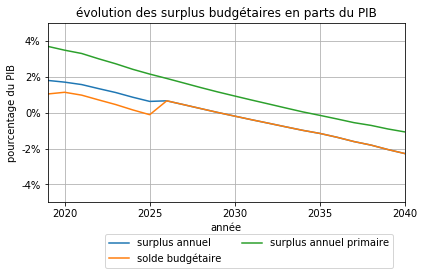

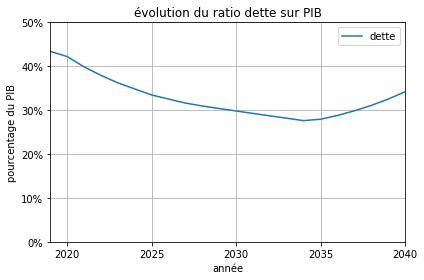

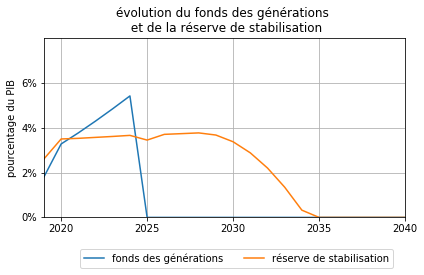

In [11]:
x.summary.loc['surplus annuel'] = x.summary.loc['surplus']/x.summary.loc['gdp']
x.summary.loc['solde budgétaire'] = x.summary.loc['net surplus']/x.summary.loc['gdp']
x.summary.loc['surplus annuel primaire'] = x.summary.loc['primary surplus gdp']
x.summary.loc[['surplus annuel','solde budgétaire','surplus annuel primaire'],:].T.plot()

plt.ylim(-0.05,0.05)
plt.yticks([-0.04,-0.02,0.0,0.02,0.04],['-4%','-2%','0%','2%','4%'])
plt.xlim(2019,2040)
plt.legend(ncol=2,bbox_to_anchor=(0.98, -0.15))
plt.xticks([2020,2025,2030,2035,2040],[2020,2025,2030,2035,2040])
plt.ylabel('pourcentage du PIB')
plt.xlabel('année')
plt.title('évolution des surplus budgétaires en parts du PIB')
plt.grid()
plt.tight_layout()
plt.savefig('surplus.png',dpi=1200)
plt.show()

x.summary.loc['dette'] = x.summary.loc['debt-to-gdp']
x.summary.loc[['dette'],:].T.plot(label ='')
plt.xlim(2019,2040)
plt.xticks([2020,2025,2030,2035,2040],[2020,2025,2030,2035,2040])
plt.ylim(0.0,0.5)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5],['0%','10%','20%','30%','40%','50%'])
plt.ylabel('pourcentage du PIB')
plt.xlabel('année')
plt.legend()
plt.title('évolution du ratio dette sur PIB')
plt.grid()
plt.tight_layout()
plt.savefig('dette.png',dpi=1200)
plt.show()

x.summary.loc['fonds des générations'] = x.summary.loc['generation fund']/x.summary.loc['gdp']
x.summary.loc['réserve de stabilisation'] = x.summary.loc['reserve']/x.summary.loc['gdp']
x.summary.loc[['fonds des générations','réserve de stabilisation'],:].T.plot()
plt.xlim(2019,2040)
plt.xticks([2020,2025,2030,2035,2040],[2020,2025,2030,2035,2040])
plt.ylim(0.0,0.08)
plt.yticks([0,0.02,0.04,0.06],['0%','2%','4%','6%'])
plt.ylabel('pourcentage du PIB')
plt.legend(ncol=2,bbox_to_anchor=(0.98, -0.15))
plt.title('évolution du fonds des générations \n et de la réserve de stabilisation')
plt.grid()
plt.tight_layout()
plt.savefig('fonds_génération_stabilisation.png',dpi=1200)
plt.show()


# Evolution des dépenses et revenus par rapport au PIB dans simfin

In [12]:
# x.summary.loc[['total revenue','total spending'],:].T.plot()
# z = pd.read_pickle(
#     'C:\\Users\\Bertrand\\Dropbox (CEDIA)\\simfin\\Model\\simfin\\params\\health_cihi_growth.pkl')

On remarque que notre simulateur prévoit que les dépenses dépassent les revenus une année seulement après l'utilisation du fonds des générations pour repayer la dette. 

Les revenus déclinent légèrement en part du PIB, du fait du vieillissement de la population et ce malgré une forte augmentation du niveau d'éducation moyen de la population active.  

En revanche, les dépenses elles augmententent très fortement. Passant d'environ 23% du PIB en 2020 à environ 39% du PIB en 2060. 

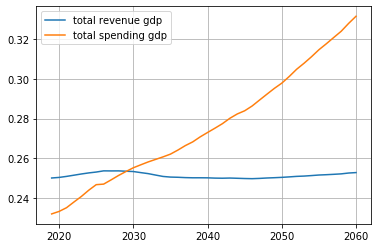

In [13]:
x.summary.loc['total revenue gdp'] = x.summary.loc['total revenue']/x.summary.loc['gdp']
x.summary.loc['total spending gdp'] = x.summary.loc['total spending']/x.summary.loc['gdp']
x.summary.loc[['total revenue gdp','total spending gdp'],:].T.plot()
plt.grid()

On voit notamment que les deux taxes qui dépendent de la démographie ici, taxes personnelles et taxes à la consommation, ont tendance à diminuer du fait d'une baisse des revenus avec l'âge et d'une baisse de la consommation aux âges avancés. 

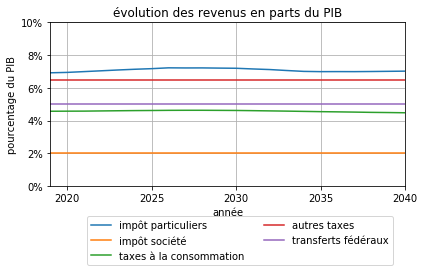

In [14]:
x.summary.loc['impôt particuliers'] = x.summary.loc['personal']/x.summary.loc['gdp']
x.summary.loc['impôt société'] = x.summary.loc['corporate']/x.summary.loc['gdp']
x.summary.loc['taxes à la consommation'] = x.summary.loc['consumption']/x.summary.loc['gdp']
x.summary.loc['autres taxes'] = x.summary.loc['other taxes']/x.summary.loc['gdp']
x.summary.loc['transferts fédéraux'] = x.summary.loc['federal transfers']/x.summary.loc['gdp']
x.summary.loc[['impôt particuliers','impôt société','taxes à la consommation',
               'autres taxes','transferts fédéraux'],:].T.plot()
plt.ylim(0,0.10)
plt.xlim(2019,2040)
plt.legend(ncol=2,bbox_to_anchor=(0.98, -0.15))
plt.xticks([2020,2025,2030,2035,2040],[2020,2025,2030,2035,2040])
plt.yticks([0.0,0.02,0.04,0.06,0.08,0.1],['0%','2%','4%','6%','8%','10%'])
plt.ylabel('pourcentage du PIB')
plt.xlabel('année')
plt.title('évolution des revenus en parts du PIB')
plt.grid()
plt.tight_layout()
plt.savefig('revenus.png',dpi=1200)
plt.show()

Au niveau des dépenses, on observe en ratio du PIB :
- une forte augmentation des dépenses de santé provenant d'une croissance structurelle des coûts des services de santé et du vieillissement de la population ; cette dépense passe d'environ 9% du PIB en 2020 à environ 15% du PIB en 2060
- une forte augmentation des dépenses de santé provenant principalement d'une croissance structurelle des coûts en éducation ; elles passent d'environ 5% en 2020 à 9% en 2060
- une forte augmentation du service de la dette qui passe de 2% en 2020 à plus de 7% du PIB en 2060
- une légère baisse des dépenses de la mission famille en part du PIB
- (par hypothèse) une stagnation des autres dépenses par rapport au PIB

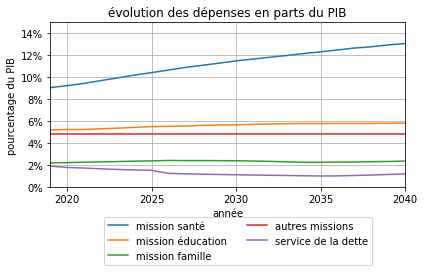

In [15]:
x.summary.loc['mission santé'] = x.summary.loc['mission health']/x.summary.loc['gdp']
x.summary.loc['mission éducation'] = x.summary.loc['mission education']/x.summary.loc['gdp']
x.summary.loc['mission famille'] = x.summary.loc['mission family']/x.summary.loc['gdp']
x.summary.loc['autres missions'] = x.summary.loc['other missions']/x.summary.loc['gdp']
x.summary.loc['service de la dette'] = x.summary.loc['debt service']/x.summary.loc['gdp']

x.summary.loc[['mission santé','mission éducation','mission famille',
               'autres missions','service de la dette'],:].T.plot()
plt.ylim(0,0.15)
plt.xlim(2019,2040)
plt.legend(ncol=2,bbox_to_anchor=(0.92, -0.15))
plt.xticks([2020,2025,2030,2035,2040],[2020,2025,2030,2035,2040])
plt.yticks([0.0,0.02,0.04,0.06,0.08,0.1,0.12,0.14],['0%','2%','4%','6%','8%','10%','12%','14%'])
plt.ylabel('pourcentage du PIB')
plt.xlabel('année')
plt.title('évolution des dépenses en parts du PIB')
plt.grid()
plt.tight_layout()
plt.savefig('dépenses.png',dpi=1200)
plt.show()